## Sentiment Analysis of Intagram Review in Google Play in using LDA, TextBolb, VADER

In [ ]:
from google_play_scraper import Sort, reviews_all, reviews, app
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from tqdm.notebook import tqdm
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk

In [ ]:
result, continuation_token = reviews(
    'com.instagram.android', 
    lang='id',                
    country='id',             
    sort=Sort.MOST_RELEVANT,  
    count=500,               
    filter_score_with=None    
)

In [ ]:
scrapeddata = pd.DataFrame(np.array(result),columns=['review'])
scrapeddata = scrapeddata.join(pd.DataFrame(scrapeddata.pop('review').tolist()))

In [ ]:
#filtering and sorting
scrapeddata[['content','score','at', 'thumbsUpCount']].head() 

,content,score,at,thumbsUpCount
0,Aplikasi ini sungguh luar biasa! Antarmuka yan...,5,2023-11-12 11:42:11,66
1,Tolong dong!! ini gimana udah lama bangett lho...,1,2023-09-21 21:10:51,4506
2,Kalo saya buat postingan foto beserta lagu. La...,1,2023-09-20 16:34:29,6245
3,"Untuk Aplikasinya bagus, tapi kenapa ketika se...",4,2023-09-14 17:14:59,1740
4,"kecewa sama Instagram sekarang, sering banget ...",1,2023-09-20 02:31:42,3248


In [ ]:
scrappeddata1 = scrapeddata[['content','score','at']]
sorteddata = scrappeddata1.sort_values(by='at', ascending=False)
sorteddata.head()

,content,score,at
272,archive pada hilang gara gara ada lagu yg hila...,1,2023-11-13 00:05:36
177,Tidak adanya fitur simpan login. Mau login ula...,1,2023-11-12 21:09:46
279,"saya kecewa sama instagram tahun ini, akun say...",1,2023-11-12 18:19:00
86,bugnya kapan di perbaiki ??? upload reels suar...,1,2023-11-12 17:32:50
281,Kapan relss ada suaranya lagi. Padahal udah up...,1,2023-11-12 15:08:50


In [ ]:
sorteddata.to_csv("instagramreviewscrapping.csv", index = False)

In [ ]:
df= sorteddata[['content', 'score']]

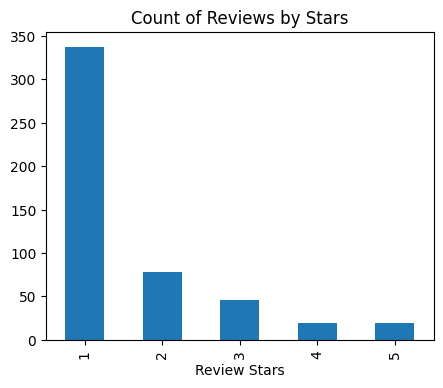

In [ ]:
#reviews by stars
ax = df['score'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Stars',figsize=(5, 4))
ax.set_xlabel('Review Stars')
plt.show()

## Text Preprocessing

**Case Folding**

In [ ]:
import re
#pembersihan data
def casefolding(text):
    text = text.lower()
    text= re.sub(r'\\https://\S+|www\.\S+','',text)
    text= re.sub(r'[^\w\s]','',text)
    text= re.sub('[+-]?[0-9]+','',text)

    emoji_pattern = re.compile("["
                         u"\U0001F600-\U0001F64F"  # emoticons
                         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                         u"\U0001F680-\U0001F6FF"  # transport & map symbols
                         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    text = text.replace('\n', ' ') # remove newline
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    text = text.strip(' ') # remove leading and trailing whitespaces

    return text

**Word Normalization**

In [ ]:
key_norm= pd.read_csv('key_norm.csv')

def text_normalize(text):
    text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm["singkat"] == word).any() else word for word in text.split()])
    text = str.lower(text)
    return text

**Stopword removal**

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stop_factory = stopwords.words('indonesian')
def remove_stop_words(text):
    sw = stop_factory + more_words
    clean_words = []
    text = text.split()
    for word in text:
        if word not in sw:
            clean_words.append(word)
    return " ".join(clean_words)

## Stemming

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    text = stemmer.stem(text)
    return text

# Text Preprocessing Pipeline

In [ ]:
def data_process(text):
    text = casefolding(text)
    text = text_normalize(text)
    text = remove_stop_words(text)
    text = stemming(text)
    return text

In [ ]:
df['content_clean'] = df['content'].apply(data_process)
df.head(5)

,content,score,content_clean
272,archive pada hilang gara gara ada lagu yg hila...,1,archive hilang gara gara lagu hilang momen bik...
177,Tidak adanya fitur simpan login. Mau login ula...,1,fitur simpan login login ulang akun arang kiri...
279,"saya kecewa sama instagram tahun ini, akun say...",1,kecewa instagram akun ganti user tambah bio mo...
86,bugnya kapan di perbaiki ??? upload reels suar...,1,bugnya baik upload reels suara story nih baru ...
281,Kapan relss ada suaranya lagi. Padahal udah up...,1,relss suara update versi baru kayak sinyal bag...


In [ ]:
df.to_csv('content_clean.csv', encoding='utf-8')

**Tokenizing**

In [ ]:
import nltk
nltk.download('punkt')
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.tokenize import word_tokenize

def tokenizingText(text): 
    text = word_tokenize(text)
    return text
df['content_tokenizing'] = df['content_clean'].apply(tokenizingText)
df.head()

,content,score,content_clean,content_tokenizing,content_preprocessing
272,archive pada hilang gara gara ada lagu yg hila...,1,archive hilang gara gara lagu hilang momen bik...,"[archive, hilang, gara, gara, lagu, hilang, mo...","[archive, hilang, gara, gara, lagu, hilang, mo..."
177,Tidak adanya fitur simpan login. Mau login ula...,1,fitur simpan login login ulang akun arang kiri...,"[fitur, simpan, login, login, ulang, akun, ara...","[fitur, simpan, login, login, ulang, akun, ara..."
279,"saya kecewa sama instagram tahun ini, akun say...",1,kecewa instagram akun ganti user tambah bio mo...,"[kecewa, instagram, akun, ganti, user, tambah,...","[kecewa, instagram, akun, ganti, user, tambah,..."
86,bugnya kapan di perbaiki ??? upload reels suar...,1,bugnya baik upload reels suara story nih baru ...,"[bugnya, baik, upload, reels, suara, story, ni...","[bugnya, baik, upload, reels, suara, story, ni..."
281,Kapan relss ada suaranya lagi. Padahal udah up...,1,relss suara update versi baru kayak sinyal bag...,"[relss, suara, update, versi, baru, kayak, sin...","[relss, suara, update, versi, baru, kayak, sin..."


In [ ]:
from nltk.probability import FreqDist
def freqdist(text):
    fdist = nltk.FreqDist(text)
    return fdist
df['content_freqdist'] = df['content_tokenizing'].apply(freqdist)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Filtering**

In [ ]:
def filteringText(text): # Remove stopwords in a text
    listStopwords = StopWordRemoverFactory().get_stop_words()
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

#Proses Pengaplikasian Fungsi Filtering

df['content_preprocessing'] = df['content_preprocessing'].apply(filteringText)
df.head()

,content,score,content_clean,content_tokenizing,content_preprocessing,content_freqdist
272,archive pada hilang gara gara ada lagu yg hila...,1,archive hilang gara gara lagu hilang momen bik...,"[archive, hilang, gara, gara, lagu, hilang, mo...","[archive, hilang, gara, gara, lagu, hilang, mo...","{'archive': 1, 'hilang': 2, 'gara': 2, 'lagu':..."
177,Tidak adanya fitur simpan login. Mau login ula...,1,fitur simpan login login ulang akun arang kiri...,"[fitur, simpan, login, login, ulang, akun, ara...","[fitur, simpan, login, login, ulang, akun, ara...","{'fitur': 1, 'simpan': 1, 'login': 4, 'ulang':..."
279,"saya kecewa sama instagram tahun ini, akun say...",1,kecewa instagram akun ganti user tambah bio mo...,"[kecewa, instagram, akun, ganti, user, tambah,...","[kecewa, instagram, akun, ganti, user, tambah,...","{'kecewa': 1, 'instagram': 1, 'akun': 1, 'gant..."
86,bugnya kapan di perbaiki ??? upload reels suar...,1,bugnya baik upload reels suara story nih baru ...,"[bugnya, baik, upload, reels, suara, story, ni...","[bugnya, baik, upload, reels, suara, story, ni...","{'bugnya': 1, 'baik': 1, 'upload': 1, 'reels':..."
281,Kapan relss ada suaranya lagi. Padahal udah up...,1,relss suara update versi baru kayak sinyal bag...,"[relss, suara, update, versi, baru, kayak, sin...","[relss, suara, update, versi, baru, kayak, sin...","{'relss': 1, 'suara': 1, 'update': 1, 'versi':..."


**Stemming**

In [ ]:
def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

df['content_preprocessing'] = df['content_tokenizing'].apply(stemmingText)
df.drop_duplicates(subset = 'content_clean', inplace = True)
df.head()

,content,score,content_clean,content_tokenizing,content_preprocessing
272,archive pada hilang gara gara ada lagu yg hila...,1,archive hilang gara gara lagu hilang momen bik...,"[archive, hilang, gara, gara, lagu, hilang, mo...","[archive, hilang, gara, gara, lagu, hilang, mo..."
177,Tidak adanya fitur simpan login. Mau login ula...,1,fitur simpan login login ulang akun arang kiri...,"[fitur, simpan, login, login, ulang, akun, ara...","[fitur, simpan, login, login, ulang, akun, ara..."
279,"saya kecewa sama instagram tahun ini, akun say...",1,kecewa instagram akun ganti user tambah bio mo...,"[kecewa, instagram, akun, ganti, user, tambah,...","[kecewa, instagram, akun, ganti, user, tambah,..."
86,bugnya kapan di perbaiki ??? upload reels suar...,1,bugnya baik upload reels suara story nih baru ...,"[bugnya, baik, upload, reels, suara, story, ni...","[bugnya, baik, upload, reels, suara, story, ni..."
281,Kapan relss ada suaranya lagi. Padahal udah up...,1,relss suara update versi baru kayak sinyal bag...,"[relss, suara, update, versi, baru, kayak, sin...","[relss, suara, update, versi, baru, kayak, sin..."


In [ ]:
lexicon_positive = dict()
import csv
with open('positive.tsv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    for row in reader:
        if "word" not in row and "weight" not in row:
            lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('negative.tsv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    for row in reader:
        if "word" not in row and "weight" not in row:
            lexicon_negative[row[0]] = int(row[1])

def analisis_sentimen(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity


In [ ]:
from gensim import corpora
import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
import pyLDAvis.gensim_models
import pickle
dictionary = corpora.Dictionary(df['content_tokenizing'])
print(dictionary)
corpus = [dictionary.doc2bow(text) for text in df['content_tokenizing']]

Dictionary<1702 unique tokens: ['aman', 'archive', 'bikin', 'fitur', 'gara']...>


In [ ]:
NUM_TOPICS = 30
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=30)

In [ ]:
ldamodel.show_topics(num_topics=30,num_words=250)

[(0,
  '0.032*"akun" + 0.022*"nya" + 0.020*"audio" + 0.018*"pakai" + 0.016*"fitur" + 0.014*"story" + 0.013*"apk" + 0.013*"postingan" + 0.013*"banget" + 0.012*"update" + 0.011*"sih" + 0.010*"gagal" + 0.010*"filter" + 0.010*"bagus" + 0.010*"mati" + 0.010*"suka" + 0.010*"terupdate" + 0.010*"hp" + 0.010*"ig" + 0.010*"lengkap" + 0.008*"cari" + 0.008*"lagu" + 0.008*"ya" + 0.007*"memposting" + 0.007*"cerita" + 0.007*"allah" + 0.007*"ngeblur" + 0.007*"sempurna" + 0.007*"camera" + 0.007*"coba" + 0.007*"lag" + 0.007*"video" + 0.007*"part" + 0.007*"upload" + 0.007*"tibatiba" + 0.007*"lain" + 0.007*"save" + 0.007*"tambah" + 0.007*"reels" + 0.006*"instagram" + 0.006*"bugnya" + 0.006*"ku" + 0.006*"kaya" + 0.005*"satu" + 0.005*"guna" + 0.004*"hilang" + 0.004*"musik" + 0.004*"bug" + 0.004*"baik" + 0.004*"tolong" + 0.004*"foto" + 0.003*"tinggal" + 0.003*"banyak" + 0.003*"hd" + 0.003*"cok" + 0.003*"subhanahu" + 0.003*"wata" + 0.003*"kambing" + 0.003*"ala" + 0.003*"play" + 0.003*"simpan" + 0.003*"dm" + 0

In [ ]:
from collections import Counter
topics= ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in df['content_tokenizing'] for w in w_list]
counter = Counter(data_flat)
out= []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
print(df_imp.head())




       word  topic_id  importance  word_count
0  aplikasi        11    0.050663         124
1     pakai        11    0.031575         163
2     bagus        11    0.020445          82
3      baik        11    0.018881         261
4        ig        11    0.018561         169


In [ ]:
df_lda.to_csv('df_imp.csv', index=False)

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=df['content_tokenizing']):
    sent_topics_df = pd.DataFrame()

    for i, row in enumerate(ldamodel[corpus]):
        row = row[0] if ldamodel.per_word_topics else row
        row = sorted(row, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=df['content_tokenizing'])
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(5))

## TextBlob

In [ ]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
mydata = pd.DataFrame(df[['content', 'content_clean']])

In [ ]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
mydata['Polarity'] = mydata['content_clean'].apply(getPolarity) 
mydata['Analysis'] = mydata['Polarity'].apply(analysis)
mydata.tail()

,content,content_clean,Polarity,Analysis
460,Penggunaan baterai operasi latar belakang sang...,guna baterai operasi latar boros buka menit gu...,0.00,Neutral
368,Setiap buka akun selalu ada notif obrolan yang...,buka akun pemberitahuan obrol baca cek ganti a...,0.00,Neutral
39,Semenjak update ke versi baru pas mau upload p...,semenjak update versi pas upload postingan pak...,0.00,Neutral
496,"Kenapa akun Instagram saya tidak seperti akun""...",akun instagram akun instagram teman repost ig ...,0.35,Positive
485,"Aplikasi the best dari dulu pake nya aman, sar...",aplikasi the best pakai nya aman saran develop...,1.00,Positive


In [ ]:
tb_counts = mydata.Analysis.value_counts()
tb_counts

Neutral     442
Positive     41
Negative     16
Name: Analysis, dtype: int64

## VADER

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

mydata['Vader Sentiment'] = mydata['content_clean'].apply(vadersentimentanalysis)

In [ ]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
mydata['Vader Analysis'] = mydata['Vader Sentiment'].apply(vader_analysis)
mydata.head()

,content,content_clean,Polarity,Analysis,Vader Sentiment,Vader Analysis
272,archive pada hilang gara gara ada lagu yg hila...,archive hilang gara gara lagu hilang momen bik...,0.0,Neutral,0.0,Neutral
177,Tidak adanya fitur simpan login. Mau login ula...,fitur simpan login login ulang akun arang kiri...,0.0,Neutral,0.0,Neutral
279,"saya kecewa sama instagram tahun ini, akun say...",kecewa instagram akun ganti user tambah bio mo...,0.0,Neutral,0.0,Neutral
86,bugnya kapan di perbaiki ??? upload reels suar...,bugnya baik upload reels suara story nih baru ...,0.0,Neutral,0.0,Neutral
281,Kapan relss ada suaranya lagi. Padahal udah up...,relss suara update versi baru kayak sinyal bag...,0.0,Neutral,0.0,Neutral


In [ ]:
vader_counts = mydata['Vader Analysis'].value_counts()
vader_counts

Neutral     483
Positive     11
Negative      5
Name: Vader Analysis, dtype: int64

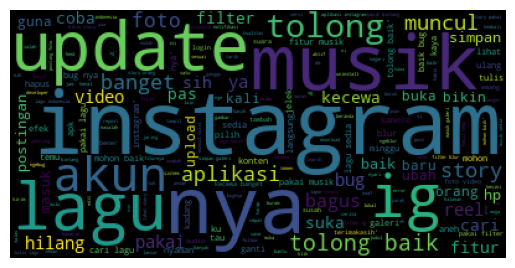

In [ ]:
from wordcloud import WordCloud

text = df['content_clean'].values
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
mydata

,content,content_clean,Polarity,Analysis,Vader Sentiment,Vader Analysis
272,archive pada hilang gara gara ada lagu yg hila...,archive hilang gara gara lagu hilang momen bik...,0.00,Neutral,0.0000,Neutral
177,Tidak adanya fitur simpan login. Mau login ula...,fitur simpan login login ulang akun arang kiri...,0.00,Neutral,0.0000,Neutral
279,"saya kecewa sama instagram tahun ini, akun say...",kecewa instagram akun ganti user tambah bio mo...,0.00,Neutral,0.0000,Neutral
86,bugnya kapan di perbaiki ??? upload reels suar...,bugnya baik upload reels suara story nih baru ...,0.00,Neutral,0.0000,Neutral
281,Kapan relss ada suaranya lagi. Padahal udah up...,relss suara update versi baru kayak sinyal bag...,0.00,Neutral,0.0000,Neutral
...,...,...,...,...,...,...
460,Penggunaan baterai operasi latar belakang sang...,guna baterai operasi latar boros buka menit gu...,0.00,Neutral,0.0000,Neutral
368,Setiap buka akun selalu ada notif obrolan yang...,buka akun pemberitahuan obrol baca cek ganti a...,0.00,Neutral,0.0000,Neutral
39,Semenjak update ke versi baru pas mau upload p...,semenjak update versi pas upload postingan pak...,0.00,Neutral,0.0000,Neutral
496,"Kenapa akun Instagram saya tidak seperti akun""...",akun instagram akun instagram teman repost ig ...,0.35,Positive,0.0000,Neutral


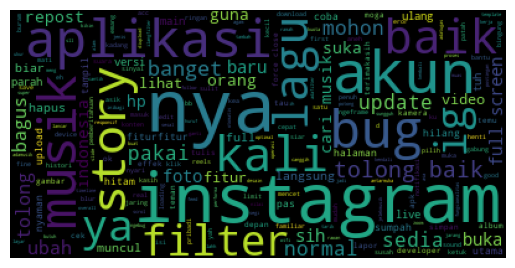

In [ ]:
positive = ' '.join([text for text in mydata['content_clean'][mydata['Analysis'] == 'Positive']])

text = positive
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

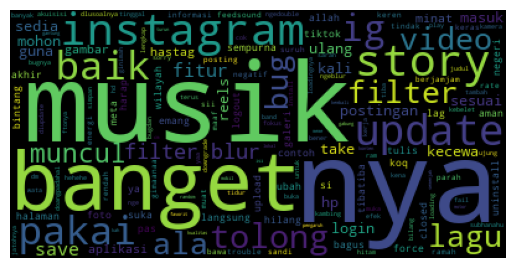

In [ ]:
negative = ' '.join([text for text in mydata['content_clean'][mydata['Analysis'] == 'Negative']])

text = negative
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

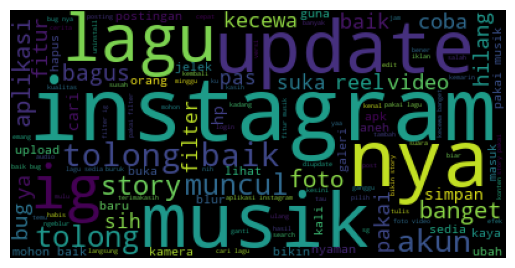

In [ ]:
neutral = ' '.join([text for text in mydata['content_clean'][mydata['Analysis'] == 'Neutral']])

text = neutral
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()